In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, spearmanr

In [2]:
path = '/home/dharakyu/signaling-bandits/outputs/fig1_data.csv'
df = pd.read_csv(path)
df = df.set_index('Name')
df

,State,Notes,User,Tags,Created,Runtime,Sweep,batch_size,chain_length,chunks,...,val_loss_2,val_loss_3,val_loss_4,val_prediction_index,val_reward,val_reward_0,val_reward_1,val_reward_2,val_reward_3,val_reward_4
Name,,,,,,,,,,,,,,,,,,,,,
4x4-partial_chunk-2_chain-len-5,finished,-,dharakyu,NaN,2022-06-03T00:18:39.000Z,16495,NaN,32,5,"[2,4,6,8,10,12]",...,-0.933042,-0.949122,-0.955235,NaN,NaN,0.488649,0.600524,0.627561,0.639179,0.641665
4x4-partial_chunk-2_chain-len-2,finished,-,dharakyu,NaN,2022-06-02T06:48:06.000Z,70182,NaN,32,2,"[2,4,6,8,10,12]",...,NaN,NaN,NaN,NaN,NaN,0.479359,0.571571,NaN,NaN,NaN
4x4-partial_chunk-2_chain-len-4,finished,-,dharakyu,NaN,2022-06-02T20:41:23.000Z,13027,NaN,32,4,"[2,4,6,8,10,12]",...,-0.938896,-0.947170,NaN,NaN,NaN,0.489136,0.590634,0.635927,0.643760,NaN
4x4-partial_chunk-10_chain-len-2,finished,-,dharakyu,NaN,2022-06-02T19:46:50.000Z,8428,NaN,32,2,"[10,15]",...,NaN,NaN,NaN,NaN,NaN,0.828552,0.761741,NaN,NaN,NaN
4x4-partial_chunk-2_chain-len-3,finished,-,dharakyu,NaN,2022-06-02T17:30:27.000Z,11447,NaN,32,3,"[2,4,6,8,10,12]",...,-0.894969,NaN,NaN,NaN,NaN,0.487623,0.582922,0.599209,NaN,NaN
4x4-full_chain-len-2,finished,-,dharakyu,NaN,2022-06-02T17:32:52.000Z,8029,NaN,32,2,NaN,...,NaN,NaN,NaN,NaN,NaN,0.890207,0.890186,NaN,NaN,NaN


In [3]:
expected_rewards = []
for chain_len in range(2, 6):
    name = '4x4-partial_chunk-2_chain-len-{chain_len}'.format(chain_len=chain_len)
    indices = range(chain_len)
    col_names = ['val_reward_{i}'.format(i=i) for i in indices]
    #subset = df[col_names]
    #print(subset)
    rewards_at_each_gen = list(df.loc[name][col_names])
    expected_rewards.append(rewards_at_each_gen)

In [6]:
baseline_full = df.loc['4x4-full_chain-len-2'][['val_reward_0']][0]
baseline_10 = df.loc['4x4-partial_chunk-10_chain-len-2'][['val_reward_0']][0]
baseline_10

0.8285523484279383

## Significance testing

In [7]:
path = '/home/dharakyu/signaling-bandits/outputs/chain_len_5.csv'
chain_len_5_df = pd.read_csv(path)
chain_len_5_df = chain_len_5_df.set_index('Name')
col_names = ['val_reward_{i}'.format(i=i) for i in range(5)]
chain_len_5_df[col_names]

,val_reward_0,val_reward_1,val_reward_2,val_reward_3,val_reward_4
Name,,,,,
4x4-partial_chunk-2_chain-len-5_run-5,0.486536,0.634298,0.661792,0.652964,0.668427
4x4-partial_chunk-2_chain-len-5_run-4,0.435684,0.591153,0.608872,0.602795,0.601402
4x4-partial_chunk-2_chain-len-5_run-3,0.501974,0.577034,0.602460,0.637187,0.630708
4x4-partial_chunk-2_chain-len-5_run-2,0.506547,0.577907,0.611634,0.629740,0.631224
4x4-partial_chunk-2_chain-len-5_run-1,0.512504,0.622226,0.653046,0.673210,0.676567


In [8]:
a = np.array(chain_len_5_df[col_names])
for i in range(4):
    gen_i = a[:, i]
    gen_i_plus_1 = a[:, i+1]
    stat, pval = ttest_ind(gen_i, gen_i_plus_1, equal_var=True)
    print('for gen', i, 'and', i+1)
    print(pval)

for gen 0 and 1
0.00027697216785725165
for gen 1 and 2
0.15154759011904137
for gen 2 and 3
0.5150161992734729
for gen 3 and 4
0.8941170158443525


In [9]:
reshaped_a = a.T.reshape(-1)
reshaped_a

array([0.48653639, 0.43568398, 0.50197363, 0.50654724, 0.51250357,
       0.63429847, 0.59115321, 0.57703384, 0.57790692, 0.62222628,
       0.66179172, 0.60887217, 0.60246009, 0.61163443, 0.65304599,
       0.65296355, 0.60279545, 0.63718739, 0.62974031, 0.67320954,
       0.66842718, 0.60140195, 0.63070758, 0.63122386, 0.67656691])

In [10]:
gen = []
for i in range(5):
    for _ in range(5):
        gen.append(i)
gen

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]

In [11]:
corr, pval = spearmanr(gen, reshaped_a)
corr
pval

3.501913569284766e-05

(0.4, 1.0)

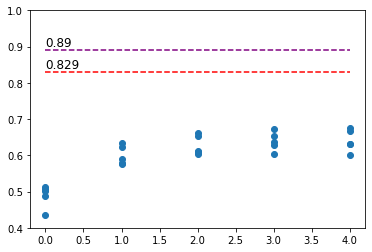

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.hlines(y=baseline_full, xmin=0, xmax=4, linestyles='dashed', color='purple', label='Full world state upper bound')
ax.text(0, 0.9, round(baseline_full, 3), fontsize=12)

plt.hlines(y=baseline_10, xmin=0, xmax=4, linestyles='dashed', color='red', label='Partial world state upper bound')
ax.text(0, 0.84, round(baseline_10, 3), fontsize=12)

plt.scatter(gen, reshaped_a)
plt.ylim(0.4, 1)

In [13]:
np.std(a, axis=0)

array([0.02784489, 0.02350674, 0.02471522, 0.02351557, 0.02751201])

## Figure

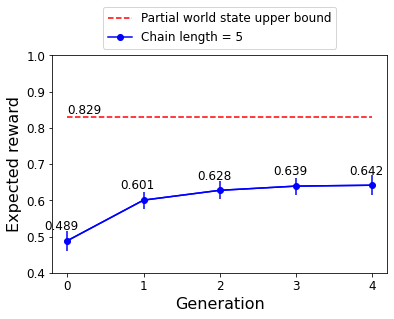

In [19]:
fig, ax = plt.subplots(figsize=(6, 4))
#plt.hlines(y=baseline_full, xmin=0, xmax=4, linestyles='dashed', color='purple', label='Full world state upper bound')
#ax.text(0, 0.9, round(baseline_full, 3), fontsize=12)

plt.hlines(y=baseline_10, xmin=0, xmax=4, linestyles='dashed', color='red', label='Partial world state upper bound')
ax.text(0, 0.84, round(baseline_10, 3), fontsize=12)

plt.plot(np.arange(5), expected_rewards[3], 'bo-', label='Chain length = 5')
plt.errorbar(np.arange(5), expected_rewards[3], np.std(a, axis=0), color='b')
plt.xticks([0, 1, 2, 3, 4], fontsize=12)
plt.xlabel('Generation', fontsize=16)
plt.ylim(0.4, 1)
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
plt.ylabel('Expected reward', fontsize=16)

for i in range(len(expected_rewards[3])):
  plt.text(i-0.3, expected_rewards[3][i]+0.03, round(expected_rewards[3][i], 3), size=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fontsize=12)
plt.show()